In [ ]:
#random forest
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

df = pd.read_csv(r'kidney_disease.csv')

# Check for null values
df.replace('?', np.nan, inplace=True)
df=df.dropna()
df.drop(columns=['rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane'], inplace=True)

X = df.drop(['classification'], axis=1)

y = df['classification']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the random forest classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 1.0


notckd    115
ckd        43
Name: classification, dtype: int64


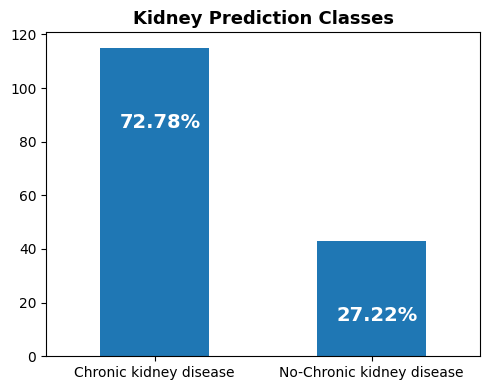

In [ ]:
import matplotlib.pyplot as plt
print(df.classification.value_counts())

# df['target'].value_counts().plot(kind='bar').set_title('Heart Disease Classes') #Simple plot

fig, ax = plt.subplots(figsize=(5,4))
name = ["Chronic kidney disease", "No-Chronic kidney disease"]
ax = df.classification.value_counts().plot(kind='bar')
ax.set_title("Kidney Prediction Classes", fontsize = 13, weight = 'bold')
ax.set_xticklabels (name, rotation = 0)

# To calculate the percentage
totals = []
for i in ax.patches:
    totals.append(i.get_height())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_x()+.09, i.get_height()-30, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=14,
                color='white', weight = 'bold')
    
plt.tight_layout()

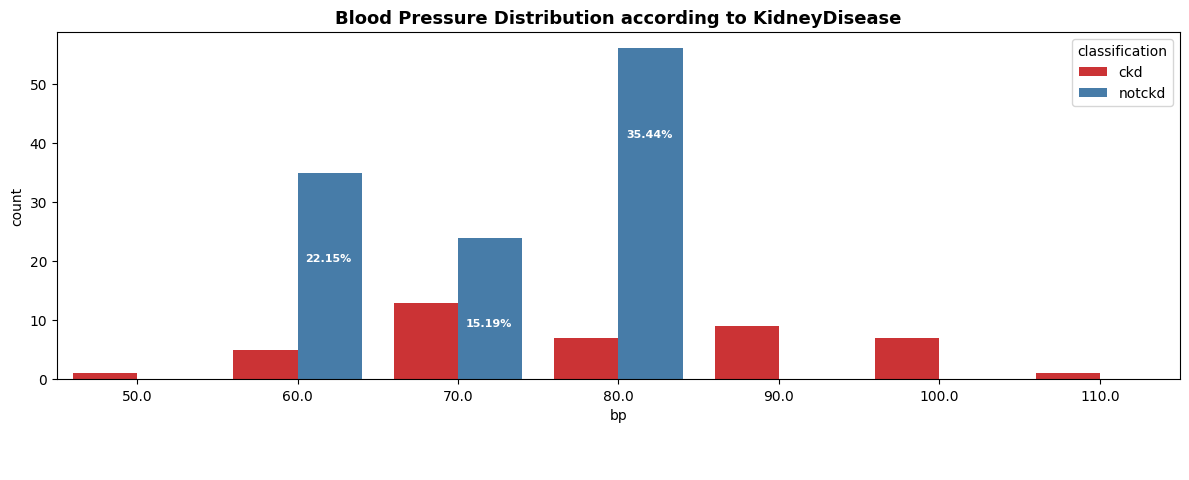

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(12,5))
name = df['bp']
ax = sns.countplot(x='bp', hue='classification', data=df, palette='Set1')
ax.set_title("Blood Pressure Distribution according to KidneyDisease", fontsize = 13, weight = 'bold')

totals = []
for i in ax.patches:
    totals.append(i.get_height())
total = sum(totals)
for i in ax.patches:
    ax.text(i.get_x()+.05, i.get_height()-15,
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=8,
                color='white', weight = 'bold')  
plt.tight_layout()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVC', SVC()))
models.append(('Logistic Regression', LogisticRegression()))
models.append(('Random Forest', RandomForestClassifier()))
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = df.classification, random_state=0)
names = []
scores = []
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))
    names.append(name)
tr_split = pd.DataFrame({'Name': names, 'Score': scores})
print(tr_split)

                  Name  Score
0                  KNN    0.8
1                  SVC    0.8
2  Logistic Regression    1.0
3        Random Forest    1.0


In [ ]:
from sklearn.model_selection import KFold
names = []
scores = []
for name, model in models:
    kfold = KFold(n_splits=10, shuffle=True, random_state=10)
    score = cross_val_score(model, X, y, cv=kfold, scoring='accuracy').mean()
    
    names.append(name)
    scores.append(score)
kf_cross_val = pd.DataFrame({'Name': names, 'Score': scores})
print(kf_cross_val)

                  Name     Score
0                  KNN  0.828333
1                  SVC  0.797083
2  Logistic Regression  1.000000
3        Random Forest  1.000000


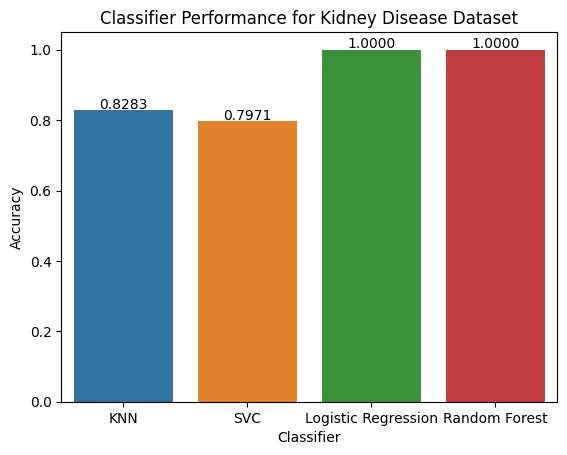

In [ ]:
axis = sns.barplot(x = 'Name', y = 'Score', data = kf_cross_val)
axis.set(xlabel='Classifier', ylabel='Accuracy')

for p in axis.patches:
    height = p.get_height()
    axis.text(p.get_x() + p.get_width()/2, height + 0.005, '{:1.4f}'.format(height), ha="center") 
    
axis.set_title("Classifier Performance for Kidney Disease Dataset")
plt.show()